# <div style="text-align: center"> HR Analytics Data Exploration and Cleaning </div>                               


####      <div style="text-align: right">  by- Lakshya Gupta & Abhiraj Singh</div>           

# Introduction
HR analytics is revolutionising the way human resources departments operate, leading to higher efficiency and better results overall. Human resources has been using analytics for years. However, the collection, processing and analysis of data has been largely manual, and given the nature of human resources dynamics and HR KPIs, the approach has been constraining HR. Therefore, it is surprising that HR departments woke up to the utility of machine learning so late in the game. 

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.spatial import distance_matrix
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import lightgbm as lgb

In [48]:
train=pd.read_csv("data/train.csv")

In [49]:
test = pd.read_csv("data/test.csv")

In [50]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [51]:
test.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89


In [52]:
describeDf=train.describe()
print(type(describeDf))
describeDf

<class 'pandas.core.frame.DataFrame'>


,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [53]:
y_train=train['is_promoted']
x_train=train.drop(columns=['is_promoted'])

In [54]:
print(x_train.index)
print(test.index)

RangeIndex(start=0, stop=54808, step=1)
RangeIndex(start=0, stop=23490, step=1)


In [55]:
append_file = x_train.append(test,ignore_index =True)

In [56]:
append_file.shape

(78298, 13)

In [57]:
#preprocess pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer

dropColumnList= ['employee_id']
imputeList = ['education']
knnImputeList = ['previous_year_rating']
catColumnList=['department', 'region','education','gender','recruitment_channel','age_bins']



# Preprocessing

* drop columns
* NA values of education
* KNN Impute for previous_year_rating
* onehot encoding

In [12]:
from scipy import stats

percentile=[]
for ind in append_file.index: 
    departmentVals=append_file['avg_training_score'][append_file['department']==append_file['department'][ind]].values
    perc =stats.percentileofscore(departmentVals, append_file['avg_training_score'][ind])
    percentile.append(perc)
     #print(append_file['department'][ind]) 
    #append_file['training_score_percentile']=append_file['avg_training_score']

In [58]:
append_file['spending_percentile']=percentile


In [59]:
append_file['work_fraction'] = append_file['length_of_service'] / append_file['age']

In [60]:
append_file

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,spending_percentile,work_fraction
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,41.579383,0.228571
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,54.543198,0.133333
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,55.555786,0.205882
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,55.555786,0.256410
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.847374,0.044444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78293,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,69.373315,0.041667
78294,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,2.000197,0.225806
78295,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,55.209820,0.153846
78296,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70,54.976373,0.037037


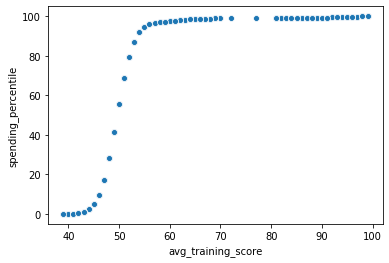

In [61]:
sns.scatterplot(append_file['avg_training_score'][append_file['department']=='Sales & Marketing'],append_file['spending_percentile'][append_file['department']=='Sales & Marketing'])

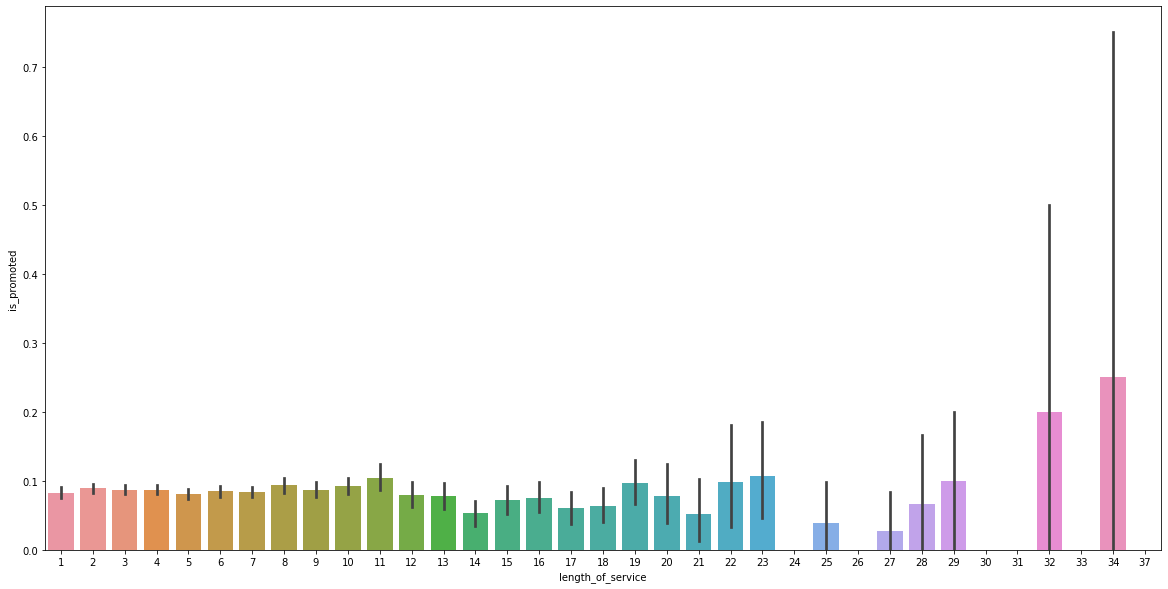

In [62]:
plt.figure(figsize=(20,10))
sns.barplot(x = x_train['length_of_service'], y = y_train)


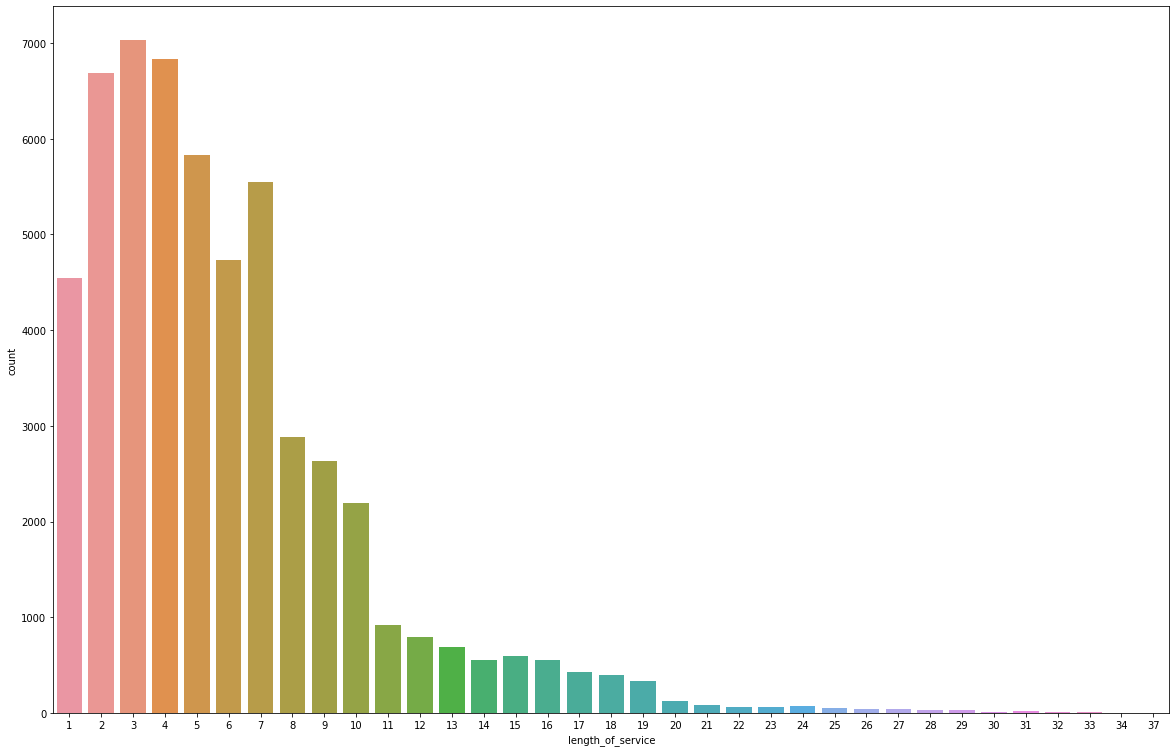

In [63]:
plt.figure(figsize=(20,13))
sns.countplot(x = x_train['length_of_service'])


In [64]:
#bins
age_bins = [0,21, 24, 25,32,35,39,44,52,56,57, 100]
labels=['a','b','c','d','e','f','g','h','i','j','k']

append_file['age_bins'] = pd.cut(append_file['age'], bins=age_bins,labels=labels)
append_file

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,spending_percentile,work_fraction,age_bins
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,41.579383,0.228571,e
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,54.543198,0.133333,d
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,55.555786,0.205882,e
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,55.555786,0.256410,f
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.847374,0.044444,h
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78293,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,69.373315,0.041667,b
78294,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,2.000197,0.225806,d
78295,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,55.209820,0.153846,d
78296,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70,54.976373,0.037037,d


In [65]:
append_file.shape

(78298, 16)

In [66]:
def preprocessing(data):
    
    data = data.drop(columns=['employee_id','avg_training_score','age'])   #drop columns
    
    for column in imputeList:
        data[column].fillna('unknown',inplace=True)
        
    data= pd.get_dummies(data) 
    
    data_columns=data.columns
    
    
    
    imputer = KNNImputer(n_neighbors=11)
    data=imputer.fit_transform(data)
    
    data=pd.DataFrame(data, columns=data_columns)
    
    return data

    
    

In [67]:
data=preprocessing(append_file)

In [68]:
data.shape

(78298, 70)

In [69]:
data

,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,spending_percentile,work_fraction,department_Analytics,department_Finance,department_HR,...,age_bins_b,age_bins_c,age_bins_d,age_bins_e,age_bins_f,age_bins_g,age_bins_h,age_bins_i,age_bins_j,age_bins_k
0,1.0,5.0,8.0,1.0,0.0,41.579383,0.228571,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,5.0,4.0,0.0,0.0,54.543198,0.133333,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,3.0,7.0,0.0,0.0,55.555786,0.205882,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,1.0,10.0,0.0,0.0,55.555786,0.256410,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,3.0,2.0,0.0,0.0,0.847374,0.044444,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78293,1.0,3.0,1.0,0.0,0.0,69.373315,0.041667,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78294,1.0,3.0,7.0,0.0,0.0,2.000197,0.225806,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78295,1.0,4.0,4.0,0.0,0.0,55.209820,0.153846,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78296,3.0,3.0,1.0,0.0,0.0,54.976373,0.037037,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
x_train=data.iloc[:y_train.shape[0],:]

In [71]:
x_train.shape

(54808, 70)

In [72]:
X_test=data.iloc[y_train.shape[0]:,:]

In [73]:
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [74]:
X_test

,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,spending_percentile,work_fraction,department_Analytics,department_Finance,department_HR,...,age_bins_b,age_bins_c,age_bins_d,age_bins_e,age_bins_f,age_bins_g,age_bins_h,age_bins_i,age_bins_j,age_bins_k
54808,1.0,3.363636,1.0,1.0,0.0,16.903143,0.041667,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54809,1.0,3.000000,5.0,0.0,0.0,68.712532,0.161290,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54810,1.0,1.000000,4.0,0.0,0.0,17.306976,0.129032,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54811,3.0,2.000000,9.0,0.0,0.0,4.917307,0.290323,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54812,1.0,4.000000,7.0,0.0,0.0,67.962503,0.233333,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78293,1.0,3.000000,1.0,0.0,0.0,69.373315,0.041667,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78294,1.0,3.000000,7.0,0.0,0.0,2.000197,0.225806,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78295,1.0,4.000000,4.0,0.0,0.0,55.209820,0.153846,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78296,3.0,3.000000,1.0,0.0,0.0,54.976373,0.037037,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
print(x_train.shape)
x_train.head(12)

(54808, 70)


,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,spending_percentile,work_fraction,department_Analytics,department_Finance,department_HR,...,age_bins_b,age_bins_c,age_bins_d,age_bins_e,age_bins_f,age_bins_g,age_bins_h,age_bins_i,age_bins_j,age_bins_k
0,1.0,5.0,8.0,1.0,0.0,41.579383,0.228571,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,5.0,4.0,0.0,0.0,54.543198,0.133333,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,3.0,7.0,0.0,0.0,55.555786,0.205882,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,1.0,10.0,0.0,0.0,55.555786,0.256410,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,3.0,2.0,0.0,0.0,0.847374,0.044444,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,2.0,3.0,7.0,0.0,0.0,56.609308,0.225806,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,3.0,5.0,0.0,0.0,40.761544,0.161290,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,3.0,6.0,0.0,0.0,86.094215,0.181818,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,4.0,5.0,0.0,0.0,29.546343,0.178571,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,5.0,5.0,1.0,0.0,92.063755,0.156250,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Train Validation Spliting

75:25

In [76]:
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=12)

## SMOTE

In [77]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [78]:
# sm = SMOTE(random_state=0,sampling_strategy=0.9)
# X_SMOTE, y_SMOTE = sm.fit_resample(X_train, Y_train)

## Light GBM

In [92]:
params = {
        "objective" : ["binary"],
       "n_estimators":[10000,500,15000],
       "reg_alpha" : [0.1,0.09,0.11],
       "reg_lambda":[0.1,0.2,0.05],
       "n_jobs":[-1],
       "colsample_bytree":[8,6,4],
       "min_child_weight":[7,8,9],
       "subsample":[0.9,0.8715623,0.8],
       "min_data_in_leaf":[50,100,200],
       "nthread":[12],
       "metric" : ["f1"],
       "num_leaves" : [400,600,800],
       "learning_rate" : [0.01],
       "verbosity" : [-1],
       "seed": [120],
       "max_bin":[20,60,40],
       'max_depth':[10,15,20],
       'min_gain_to_split':[0.02,0.0222415,0.03],
       'scale_pos_weight':[2]
    }

In [ ]:
colsample_bytree= 8,
 learning_rate=0.01,
  max_bin = 20,
  max_depth = 10,
  metric =  'f1' ,
  min_child_weight = 7,
  min_data_in_leaf = 50,
  min_gain_to_split = 0.02,
  n_estimators = 10000,
  n_jobs = -1,
  nthread = 12,
  num_leaves = 400,
  objective =  'binary' ,
  reg_alpha = 0.1,
  reg_lambda = 0.1,
  scale_pos_weight = 2,
  seed = 120,
  subsample = 0.9,
  verbosity = -1

In [103]:
mdl = lgb.LGBMClassifier(
        objective= "binary",
       n_estimators=10000,
       reg_alpha = 0.1,
       reg_lambda=0.1,
       n_jobs=-1,
       colsample_bytree=.8,
       min_child_weight=7,
       subsample=0.9,
       min_data_in_leaf=50,
       nthread=12,
       metric = "f1",
       num_leaves = 400,
       learning_rate = 0.01,
       verbosity = -1,
       seed= 120,
       max_bin=20,
       max_depth=10,
       min_gain_to_split=.02,
       scale_pos_weight=2)

In [104]:
#
# Run the grid
mdl.fit(X_train,Y_train)

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.01, max_bin=20,
               max_depth=10, metric='f1', min_child_weight=7,
               min_data_in_leaf=50, min_gain_to_split=0.02, n_estimators=10000,
               nthread=12, num_leaves=400, objective='binary', reg_alpha=0.1,
               reg_lambda=0.1, scale_pos_weight=2, seed=120, subsample=0.9,
               verbosity=-1)

In [105]:
y_pred = mdl.predict(X_val)
print(f"Accuracy: {round(metrics.accuracy_score(Y_val, y_pred)*100, 2)}%")
print(f"Balanced Accuracy: {round(metrics.balanced_accuracy_score(Y_val, y_pred)*100, 2)}%")
print(f"Balanced Accuracy: {round(metrics.f1_score(Y_val, y_pred)*100, 2)}%")
print(classification_report(Y_val,y_pred))
df_confusion = pd.crosstab(Y_val, y_pred)
df_confusion

Accuracy: 93.34%
Balanced Accuracy: 68.74%
Balanced Accuracy: 50.03%
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     12533
           1       0.69      0.39      0.50      1169

    accuracy                           0.93     13702
   macro avg       0.82      0.69      0.73     13702
weighted avg       0.92      0.93      0.92     13702



col_0,0,1
is_promoted,,
0,12332,201
1,712,457


In [83]:
y_pred = mdl.predict(X_val)
print(f"Accuracy: {round(metrics.accuracy_score(Y_val, y_pred)*100, 2)}%")
print(f"Balanced Accuracy: {round(metrics.balanced_accuracy_score(Y_val, y_pred)*100, 2)}%")
print(f"Balanced Accuracy: {round(metrics.f1_score(Y_val, y_pred)*100, 2)}%")
print(classification_report(Y_val,y_pred))
df_confusion = pd.crosstab(Y_val, y_pred)
df_confusion

Accuracy: 93.02%
Balanced Accuracy: 68.92%
Balanced Accuracy: 49.34%
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     12533
           1       0.65      0.40      0.49      1169

    accuracy                           0.93     13702
   macro avg       0.80      0.69      0.73     13702
weighted avg       0.92      0.93      0.92     13702



col_0,0,1
is_promoted,,
0,12279,254
1,703,466


In [93]:
mdlTuned = lgb.LGBMClassifier()

In [94]:
grid = GridSearchCV(mdlTuned, params, verbose=1, cv=3, n_jobs=-1,scoring = 'f1')
grid.fit(x_train,y_train)

Fitting 3 folds for each of 177147 candidates, totalling 531441 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 8426 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 9776 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 11226 tasks      

LightGBMError: Check failed: feature_fraction <=1.0 at D:\a\1\s\python-package\compile\src\io\config_auto.cpp, line 335 .


In [97]:
grid.best_params_

{'colsample_bytree': 8,
 'learning_rate': 0.01,
 'max_bin': 20,
 'max_depth': 10,
 'metric': 'f1',
 'min_child_weight': 7,
 'min_data_in_leaf': 50,
 'min_gain_to_split': 0.02,
 'n_estimators': 10000,
 'n_jobs': -1,
 'nthread': 12,
 'num_leaves': 400,
 'objective': 'binary',
 'reg_alpha': 0.1,
 'reg_lambda': 0.1,
 'scale_pos_weight': 2,
 'seed': 120,
 'subsample': 0.9,
 'verbosity': -1}

In [ ]:
{colsample_bytree= 8,
 learning_rate=0.01,
 'max_bin': 20,
 'max_depth': 10,
 'metric': 'f1',
 'min_child_weight': 7,
 'min_data_in_leaf': 50,
 'min_gain_to_split': 0.02,
 'n_estimators': 10000,
 'n_jobs': -1,
 'nthread': 12,
 'num_leaves': 400,
 'objective': 'binary',
 'reg_alpha': 0.1,
 'reg_lambda': 0.1,
 'scale_pos_weight': 2,
 'seed': 120,
 'subsample': 0.9,
 'verbosity': -1}

In [101]:
mdlFinal = lgb.LGBMClassifier(colsample_bytree= 8,
 learning_rate=0.01,
  max_bin = 20,
  max_depth = 10,
  metric =  'f1' ,
  min_child_weight = 7,
  min_data_in_leaf = 50,
  min_gain_to_split = 0.02,
  n_estimators = 10000,
  n_jobs = -1,
  nthread = 12,
  num_leaves = 400,
  objective =  'binary' ,
  reg_alpha = 0.1,
  reg_lambda = 0.1,
  scale_pos_weight = 2,
  seed = 120,
  subsample = 0.9,
  verbosity = -1)

In [102]:
mdlFinal.fit(X_train,Y_train)

LightGBMError: Check failed: feature_fraction <=1.0 at D:\a\1\s\python-package\compile\src\io\config_auto.cpp, line 335 .


# Catboost

In [218]:
from catboost import CatBoostClassifier
import timeit
from catboost import cv
from catboost import *

In [219]:


def train_on_cpu():  
  model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.03
  )
  
  model.fit(
      x_train, y_train,
      cat_features=catColumnList,
      eval_set=(X_val, Y_val),
      verbose=10
  );   
      
cpu_time = timeit.timeit('train_on_cpu()', 
                         setup="from __main__ import train_on_cpu", 
                         number=1)

print('Time to fit model on CPU: {} sec'.format(int(cpu_time)))

0:	learn: 0.6471936	test: 0.6470437	best: 0.6470437 (0)	total: 47.3ms	remaining: 47.2s
10:	learn: 0.3869877	test: 0.3861618	best: 0.3861618 (10)	total: 484ms	remaining: 43.5s
20:	learn: 0.2820538	test: 0.2811972	best: 0.2811972 (20)	total: 974ms	remaining: 45.4s
30:	learn: 0.2322902	test: 0.2314223	best: 0.2314223 (30)	total: 1.36s	remaining: 42.6s
40:	learn: 0.2071919	test: 0.2063167	best: 0.2063167 (40)	total: 1.8s	remaining: 42.1s
50:	learn: 0.1911284	test: 0.1903755	best: 0.1903755 (50)	total: 2.22s	remaining: 41.3s
60:	learn: 0.1819165	test: 0.1811333	best: 0.1811333 (60)	total: 2.69s	remaining: 41.4s
70:	learn: 0.1780928	test: 0.1773094	best: 0.1773094 (70)	total: 3.15s	remaining: 41.3s
80:	learn: 0.1747251	test: 0.1739498	best: 0.1739498 (80)	total: 3.64s	remaining: 41.3s
90:	learn: 0.1722838	test: 0.1714713	best: 0.1714713 (90)	total: 4.1s	remaining: 41s
100:	learn: 0.1707900	test: 0.1699121	best: 0.1699121 (100)	total: 4.52s	remaining: 40.3s
110:	learn: 0.1697049	test: 0.16887

920:	learn: 0.1496118	test: 0.1522485	best: 0.1522485 (920)	total: 43.2s	remaining: 3.7s
930:	learn: 0.1494897	test: 0.1521722	best: 0.1521722 (930)	total: 43.6s	remaining: 3.23s
940:	learn: 0.1493160	test: 0.1519967	best: 0.1519967 (940)	total: 44.1s	remaining: 2.76s
950:	learn: 0.1491420	test: 0.1518382	best: 0.1518382 (950)	total: 44.6s	remaining: 2.3s
960:	learn: 0.1489941	test: 0.1517349	best: 0.1517349 (960)	total: 45.1s	remaining: 1.83s
970:	learn: 0.1488686	test: 0.1516200	best: 0.1516200 (970)	total: 45.6s	remaining: 1.36s
980:	learn: 0.1487029	test: 0.1515087	best: 0.1515087 (980)	total: 46s	remaining: 892ms
990:	learn: 0.1485751	test: 0.1514164	best: 0.1514164 (990)	total: 46.5s	remaining: 422ms
999:	learn: 0.1484896	test: 0.1513665	best: 0.1513665 (999)	total: 46.9s	remaining: 0us

bestTest = 0.1513664958
bestIteration = 999

Time to fit model on CPU: 47 sec


In [232]:
Catmodel = CatBoostClassifier(
    iterations=1200,
    learning_rate=0.05,
    task_type='GPU',
    eval_metric='F1',
    use_best_model=True,
    l2_leaf_reg=0.2
  )

    
  
Catmodel.fit(x_train, y_train,
      cat_features=catColumnList,
      eval_set=(X_val, Y_val),
      verbose=150
  );   



      
# gpu_time = timeit.timeit('train_on_gpu()', 
#                          setup="from __main__ import train_on_gpu", 
#                          number=1)

# print('Time to fit model on GPU: {} sec'.format(int(gpu_time)))
# print('GPU speedup over CPU: ' + '%.2f' % (cpu_time/gpu_time) + 'x')

0:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 40.8ms	remaining: 49s
10:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 456ms	remaining: 49.3s
20:	learn: 0.1058824	test: 0.1487342	best: 0.1487342 (20)	total: 867ms	remaining: 48.7s
30:	learn: 0.4582657	test: 0.4815534	best: 0.4815534 (28)	total: 1.31s	remaining: 49.5s
40:	learn: 0.4645911	test: 0.4835165	best: 0.4884021 (37)	total: 1.72s	remaining: 48.7s
50:	learn: 0.4777495	test: 0.4945548	best: 0.4945548 (50)	total: 2.16s	remaining: 48.6s
60:	learn: 0.4837180	test: 0.5006369	best: 0.5006369 (60)	total: 2.58s	remaining: 48.3s
70:	learn: 0.4869812	test: 0.5047680	best: 0.5047680 (70)	total: 3.11s	remaining: 49.4s
80:	learn: 0.4893784	test: 0.5044360	best: 0.5063452 (72)	total: 3.53s	remaining: 48.7s
90:	learn: 0.4926124	test: 0.5072555	best: 0.5072555 (88)	total: 3.95s	remaining: 48.1s
100:	learn: 0.4932369	test: 0.5081967	best: 0.5091367 (94)	total: 4.39s	remaining: 47.8s
110:	learn: 0.4930774	test: 0.50881

920:	learn: 0.5502597	test: 0.5234568	best: 0.5254027 (533)	total: 41s	remaining: 12.4s
930:	learn: 0.5514290	test: 0.5240444	best: 0.5254027 (533)	total: 41.4s	remaining: 12s
940:	learn: 0.5515133	test: 0.5243677	best: 0.5254027 (533)	total: 41.8s	remaining: 11.5s
950:	learn: 0.5522297	test: 0.5237801	best: 0.5254027 (533)	total: 42.3s	remaining: 11.1s
960:	learn: 0.5526718	test: 0.5234568	best: 0.5254027 (533)	total: 42.7s	remaining: 10.6s
970:	learn: 0.5529448	test: 0.5231911	best: 0.5254027 (533)	total: 43.2s	remaining: 10.2s
980:	learn: 0.5543528	test: 0.5252774	best: 0.5254027 (533)	total: 43.6s	remaining: 9.74s
990:	learn: 0.5554878	test: 0.5243677	best: 0.5254027 (533)	total: 44.1s	remaining: 9.3s
1000:	learn: 0.5559281	test: 0.5240444	best: 0.5254027 (533)	total: 44.5s	remaining: 8.85s
1010:	learn: 0.5563681	test: 0.5240444	best: 0.5254027 (533)	total: 45s	remaining: 8.41s
1020:	learn: 0.5570276	test: 0.5243677	best: 0.5254027 (533)	total: 45.4s	remaining: 7.96s
1030:	learn: 0

In [233]:
y_pred = Catmodel.predict(X_val)
print(f"Accuracy: {round(metrics.accuracy_score(Y_val, y_pred)*100, 2)}%")
print(f"Balanced Accuracy: {round(metrics.balanced_accuracy_score(Y_val, y_pred)*100, 2)}%")
print(f"Balanced Accuracy: {round(metrics.f1_score(Y_val, y_pred)*100, 2)}%")
print(classification_report(Y_val,y_pred))
df_confusion = pd.crosstab(Y_val, y_pred)
df_confusion

Accuracy: 94.39%
Balanced Accuracy: 68.23%
Balanced Accuracy: 52.74%
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     12533
           1       0.94      0.37      0.53      1169

    accuracy                           0.94     13702
   macro avg       0.94      0.68      0.75     13702
weighted avg       0.94      0.94      0.93     13702



col_0,0,1
is_promoted,,
0,12504,29
1,740,429


In [240]:

# Catmodel = CatBoostClassifier(
    
    
    
#   )

# grid = {'loss_function' : 'Logloss',
#        'learning_rate': [0.03, 0.1],
#         'depth': [4, 6, 10],
#         'l2_leaf_reg': [1, 3, 5, 7, 9],
#         'task_type':'GPU',
#         'custom_loss': 'F1',
#         'iterations':500
#        }
Catmodel2 = CatBoostClassifier(
    iterations=1200,
    learning_rate=0.05,
    task_type='GPU',
    eval_metric='F1'
    #use_best_model=True,
  )

grid = {
        'depth': [4, 6,8, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

grid_search_result = Catmodel2.grid_search(grid, 
                                       X=Pool(x_train,label=y_train, cat_features=catColumnList), 
                                       plot=False,verbose=100)

# params = {}
# params['loss_function'] = 'Logloss'
# params['iterations'] = 200
# params['custom_loss'] = 'F1'
# params['random_seed'] = 63
# params['learning_rate'] = 0.5
# params['learning_rate']=[0.05]

# grid_search_result = cv(params=params, dtrain = Pool(x_train,label=y_train, cat_features=catColumnList), 
#                                        fold_count=3,
#                                        plot=False)

bestTest = 0.4858044164
bestIteration = 336
0:	loss: 0.4858044	best: 0.4858044 (0)	total: 1m 4s	remaining: 20m 20s
bestTest = 0.4893449092
bestIteration = 781
bestTest = 0.4850393701
bestIteration = 1118
bestTest = 0.4893449092
bestIteration = 669
bestTest = 0.4865718799
bestIteration = 500
bestTest = 0.4886095837
bestIteration = 996
bestTest = 0.4862313139
bestIteration = 651
bestTest = 0.4881889764
bestIteration = 827
bestTest = 0.4861878453
bestIteration = 1107
bestTest = 0.487804878
bestIteration = 1175
bestTest = 0.4866562009
bestIteration = 635
bestTest = 0.4889937107
bestIteration = 594
bestTest = 0.4866562009
bestIteration = 858
bestTest = 0.4869976359
bestIteration = 391
bestTest = 0.4885736801
bestIteration = 999
bestTest = 0.487804878
bestIteration = 956
bestTest = 0.4873817035
bestIteration = 427
bestTest = 0.4861878453
bestIteration = 382
bestTest = 0.4881889764
bestIteration = 348
bestTest = 0.4877663773
bestIteration = 361
19:	loss: 0.4877664	best: 0.4893449 (1)	total: 3

In [245]:
grid_search_result['params']

{'depth': 4, 'l2_leaf_reg': 3}

# Writing to result to CSV

In [106]:
molelPipe=mdl
y_pred = molelPipe.predict(X_test)
test['employee_id']

0         8724
1        74430
2        72255
3        38562
4        64486
         ...  
23485    53478
23486    25600
23487    45409
23488     1186
23489     5973
Name: employee_id, Length: 23490, dtype: int64

In [107]:
result=pd.DataFrame()
result['employee_id']=test['employee_id']
result['is_promoted']=y_pred
result

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [108]:
result.to_csv("base_result4.csv",index=False)